In [1]:
!pip install tensorflow

In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [9]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
df = pd.concat([X, y], axis=1)
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [19]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=4) # Split into training and temporary test set
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=4) # Split training into training and validation

In [20]:
# Normalize features to range (0,1)
max_val = train_df.max(axis=0)
min_val = train_df.min(axis=0)
range_val = max_val - min_val
train_df = (train_df - min_val) / range_val
val_df = (val_df - min_val) / range_val

In [21]:
# Split features and target
X_train = train_df.drop('target', axis=1)
X_val = val_df.drop('target', axis=1)
X_test = test_df.drop('target', axis=1) # Define X_test
y_train = train_df['target']
y_val = val_df['target']
y_test = test_df['target'] # Define y_test
input_shape = [X_train.shape[1]]
input_shape

[30]

In [29]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=356, activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=126, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6763 - loss: 0.6569 - val_accuracy: 0.9211 - val_loss: 0.4789
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8745 - loss: 0.4486 - val_accuracy: 0.8947 - val_loss: 0.2870
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8776 - loss: 0.2925 - val_accuracy: 0.9474 - val_loss: 0.1724
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8796 - loss: 0.2440 - val_accuracy: 0.9474 - val_loss: 0.1303
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9300 - loss: 0.1611 - val_accuracy: 0.9737 - val_loss: 0.1156
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8930 - loss: 0.2569 - val_accuracy: 0.9649 - val_loss: 0.1123
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9537 - loss: 0.1414 - val_accuracy: 0.9386 - val_loss: 0.1476
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9276 - loss: 0.1415 - val_accuracy: 0.9825 - v

<Axes: >

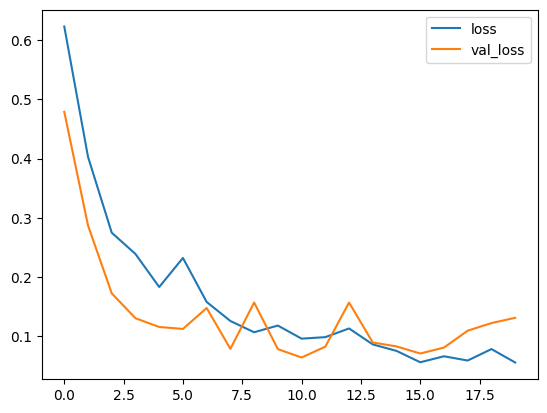

In [31]:
loss_df = pd.DataFrame(history.history)

# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()